In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

plt.style.use('ggplot')

In [2]:
file_path = os.path.join("data","covid")
csv_path_1 = os.path.join(file_path,"edited-WHO-Covid_dataframe.csv")
df = pd.read_csv(csv_path_1)
df

,Unnamed: 0,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...,...
70383,70383,2020-10-23,ZW,Zimbabwe,AFRO,27,8242,0,236
70384,70384,2020-10-24,ZW,Zimbabwe,AFRO,15,8257,0,236
70385,70385,2020-10-25,ZW,Zimbabwe,AFRO,12,8269,0,236
70386,70386,2020-10-26,ZW,Zimbabwe,AFRO,7,8276,1,237


In [3]:
mask_UK = df["Country_code"] == 'GB'
df_UK = df.loc[mask_UK]
df_UK = df_UK.replace(to_replace='The United Kingdom',value='United Kingdom')
df_UK = df_UK.drop(["Country_code","WHO_region"],axis=1)
df_UK = df_UK.assign(Case_pct_change=df_UK["New_cases"].pct_change())
df_UK = df_UK.set_index("Date_reported")
df_UK = df_UK.loc[(df_UK["New_cases"]!=0)]
df_UK = df_UK.assign(Mortality_rate=df_UK["Cumulative_deaths"]/df_UK["Cumulative_cases"]*100)
csv_path_UK = os.path.join(file_path,"UK-Covid-data.csv")
df_UK.to_csv(csv_path_UK)
df_UK

,Unnamed: 0,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Case_pct_change,Mortality_rate
Date_reported,,,,,,,,
2020-02-01,62627,United Kingdom,2,2,0,0,inf,0.000000
2020-02-05,62631,United Kingdom,1,3,0,0,inf,0.000000
2020-02-07,62633,United Kingdom,1,4,0,0,inf,0.000000
2020-02-10,62636,United Kingdom,4,8,0,0,inf,0.000000
2020-02-11,62637,United Kingdom,1,9,0,0,-0.750000,0.000000
...,...,...,...,...,...,...,...,...
2020-10-23,62892,United Kingdom,21238,810471,189,44347,-0.204182,5.471757
2020-10-24,62893,United Kingdom,20531,831002,224,44571,-0.033289,5.363525
2020-10-25,62894,United Kingdom,23012,854014,174,44745,0.120842,5.239375


In [5]:
df_UK.drop('Unnamed: 0',axis=1,inplace=True)
df_UK

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Case_pct_change,Mortality_rate
Date_reported,,,,,,,
2020-02-01,United Kingdom,2,2,0,0,inf,0.000000
2020-02-05,United Kingdom,1,3,0,0,inf,0.000000
2020-02-07,United Kingdom,1,4,0,0,inf,0.000000
2020-02-10,United Kingdom,4,8,0,0,inf,0.000000
2020-02-11,United Kingdom,1,9,0,0,-0.750000,0.000000
...,...,...,...,...,...,...,...
2020-10-23,United Kingdom,21238,810471,189,44347,-0.204182,5.471757
2020-10-24,United Kingdom,20531,831002,224,44571,-0.033289,5.363525
2020-10-25,United Kingdom,23012,854014,174,44745,0.120842,5.239375


In [6]:
url = 'https://api.coronavirus.data.gov.uk/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newAdmissions%22:%22newAdmissions%22,%22cumAdmissions%22:%22cumAdmissions%22%7D&format=csv'
df_UK_hosp = pd.read_csv(url)
df_UK_hosp

,areaType,areaName,areaCode,date,newAdmissions,cumAdmissions
0,overview,United Kingdom,K02000001,2020-10-21,1227,160784.0
1,overview,United Kingdom,K02000001,2020-10-20,1153,159557.0
2,overview,United Kingdom,K02000001,2020-10-19,1061,158404.0
3,overview,United Kingdom,K02000001,2020-10-18,1064,157343.0
4,overview,United Kingdom,K02000001,2020-10-17,1007,156279.0
...,...,...,...,...,...,...
208,overview,United Kingdom,K02000001,2020-03-27,2224,12817.0
209,overview,United Kingdom,K02000001,2020-03-26,1930,10593.0
210,overview,United Kingdom,K02000001,2020-03-25,2084,8663.0
211,overview,United Kingdom,K02000001,2020-03-24,1719,6579.0


In [7]:
df_UK_hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   areaType       213 non-null    object 
 1   areaName       213 non-null    object 
 2   areaCode       213 non-null    object 
 3   date           213 non-null    object 
 4   newAdmissions  213 non-null    int64  
 5   cumAdmissions  212 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.1+ KB


In [8]:
df_UK_hosp.describe()

,newAdmissions,cumAdmissions
count,213.000000,212.000000
mean,737.464789,114402.372642
std,785.651871,34966.513529
min,0.000000,4860.000000
25%,165.000000,103378.500000
50%,412.000000,128573.000000
75%,1002.000000,135420.000000
max,3564.000000,160784.000000


In [9]:
df_UK_hosp['date'] =  pd.to_datetime(df_UK_hosp['date'])
df_UK_hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   areaType       213 non-null    object        
 1   areaName       213 non-null    object        
 2   areaCode       213 non-null    object        
 3   date           213 non-null    datetime64[ns]
 4   newAdmissions  213 non-null    int64         
 5   cumAdmissions  212 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 10.1+ KB


In [10]:
df_UK_hosp = df_UK_hosp.set_index(df_UK_hosp.date)
df_UK_hosp

,areaType,areaName,areaCode,date,newAdmissions,cumAdmissions
date,,,,,,
2020-10-21,overview,United Kingdom,K02000001,2020-10-21,1227,160784.0
2020-10-20,overview,United Kingdom,K02000001,2020-10-20,1153,159557.0
2020-10-19,overview,United Kingdom,K02000001,2020-10-19,1061,158404.0
2020-10-18,overview,United Kingdom,K02000001,2020-10-18,1064,157343.0
2020-10-17,overview,United Kingdom,K02000001,2020-10-17,1007,156279.0
...,...,...,...,...,...,...
2020-03-27,overview,United Kingdom,K02000001,2020-03-27,2224,12817.0
2020-03-26,overview,United Kingdom,K02000001,2020-03-26,1930,10593.0
2020-03-25,overview,United Kingdom,K02000001,2020-03-25,2084,8663.0


In [11]:
df_UK_hosp.isnull().sum()


areaType         0
areaName         0
areaCode         0
date             0
newAdmissions    0
cumAdmissions    1
dtype: int64

In [12]:
df_UK_hosp = df_UK_hosp.drop(['areaType','areaName','areaCode'],axis=1)


In [13]:
df_UK_hosp

,date,newAdmissions,cumAdmissions
date,,,
2020-10-21,2020-10-21,1227,160784.0
2020-10-20,2020-10-20,1153,159557.0
2020-10-19,2020-10-19,1061,158404.0
2020-10-18,2020-10-18,1064,157343.0
2020-10-17,2020-10-17,1007,156279.0
...,...,...,...
2020-03-27,2020-03-27,2224,12817.0
2020-03-26,2020-03-26,1930,10593.0
2020-03-25,2020-03-25,2084,8663.0


In [14]:
df_UK_hosp.drop('date',axis=1,inplace=True)
df_UK_hosp

,newAdmissions,cumAdmissions
date,,
2020-10-21,1227,160784.0
2020-10-20,1153,159557.0
2020-10-19,1061,158404.0
2020-10-18,1064,157343.0
2020-10-17,1007,156279.0
...,...,...
2020-03-27,2224,12817.0
2020-03-26,1930,10593.0
2020-03-25,2084,8663.0


In [15]:
df_UK = pd.merge(df_UK, df_UK_hosp, right_index=True, left_index=True)
df_UK

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Case_pct_change,Mortality_rate,newAdmissions,cumAdmissions
2020-10-21,United Kingdom,21330,762546,241,43967,0.134393,5.765816,1227,160784.0
2020-10-20,United Kingdom,18803,741216,80,43726,0.107296,5.899225,1153,159557.0
2020-10-19,United Kingdom,16981,722413,67,43646,0.050090,6.041696,1061,158404.0
2020-10-18,United Kingdom,16171,705432,150,43579,0.034282,6.177633,1064,157343.0
2020-10-17,United Kingdom,15635,689261,136,43429,-0.176151,6.300806,1007,156279.0
...,...,...,...,...,...,...,...,...,...
2020-03-27,United Kingdom,2692,17717,181,884,0.133474,4.989558,2224,12817.0
2020-03-26,United Kingdom,2375,15025,191,703,0.015825,4.678869,1930,10593.0
2020-03-25,United Kingdom,2338,12650,148,512,0.696662,4.047431,2084,8663.0
2020-03-24,United Kingdom,1378,10312,76,364,0.150250,3.529868,1719,6579.0


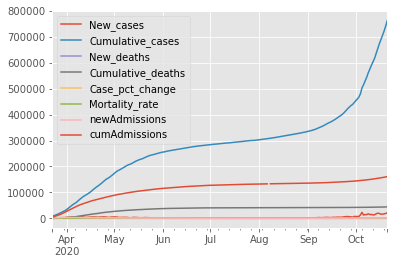

In [16]:
df_UK.plot()

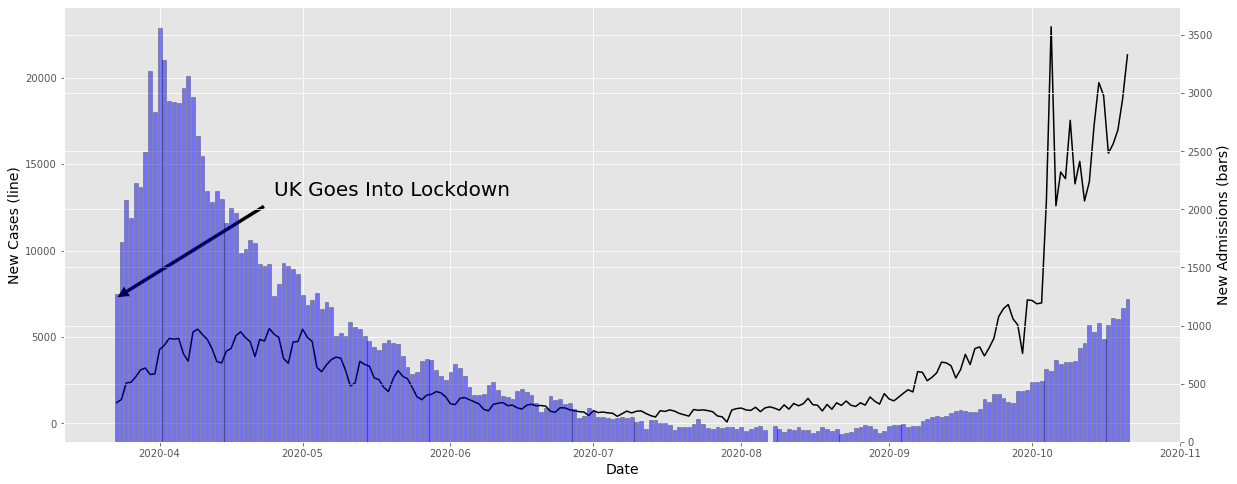

In [17]:
# create figure and axes objects with subplots()
fig,ax = plt.subplots(figsize=(20, 8))
# make a plot
ax.plot(df_UK.index, df_UK.loc[:,"New_cases"], color="black")
# set x-axis label
ax.set_xlabel("Date",fontsize=14,color='black')
# set y-axis label
ax.set_ylabel("New Cases (line)",color="black",fontsize=14)
ax.annotate('UK Goes Into Lockdown',
            xy=(0.04,0.32), xycoords='axes fraction',
            xytext=(0.4, 0.6), textcoords='axes fraction',
            
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize=20)
ax.grid(True)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.bar(df_UK.index,  df_UK.loc[:,"newAdmissions"],color="blue",edgecolor='k',alpha=0.5)
ax2.set_ylabel("New Admissions (bars)",color="black",fontsize=14)
ax2.grid(True)
plt.show()